In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Filling NaN Values

<AxesSubplot: xlabel='Survived', ylabel='count'>

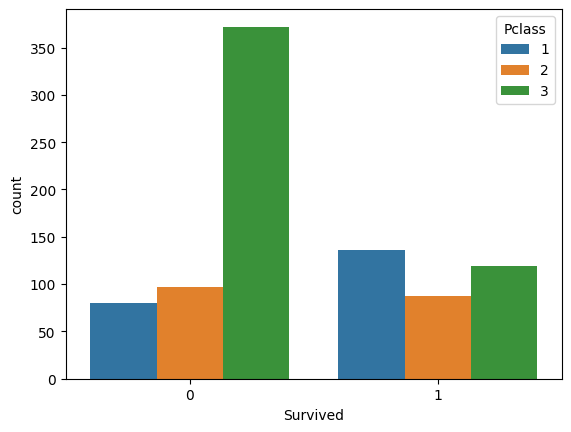

In [5]:
# Relation in survival of different Pclasses
sns.countplot(x='Survived',data=train,hue='Pclass')

C:\Users\Hp\AppData\Local\Temp\ipykernel_76956\14674506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'],kde=False)


<AxesSubplot: xlabel='Age'>

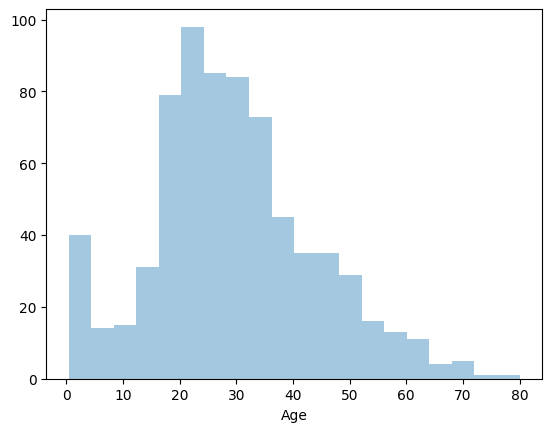

In [6]:
# Information of age group in Titanic
sns.distplot(train['Age'],kde=False)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Checking number of null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

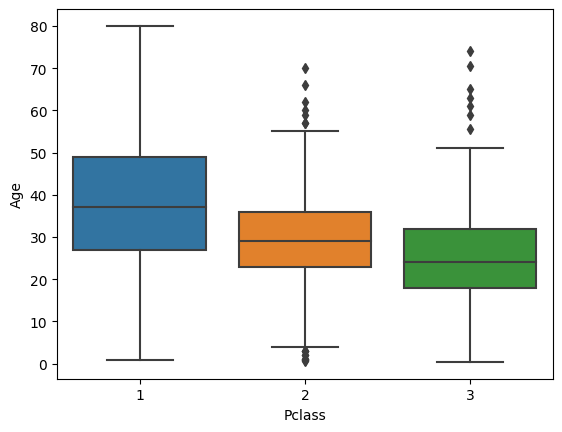

In [9]:
# Relation of Passenger class and Age group
sns.boxplot(x='Pclass',y='Age',data=train)

In [10]:
print(train[train['Pclass']==1]['Age'].mean())
print(train[train['Pclass']==2]['Age'].mean())
print(train[train['Pclass']==3]['Age'].mean())

print(train[train['Pclass']==1]['Fare'].mean())
print(train[train['Pclass']==2]['Fare'].mean())
print(train[train['Pclass']==3]['Fare'].mean())

38.233440860215055
29.87763005780347
25.14061971830986
84.1546875
20.662183152173913
13.675550101832993


In [11]:
id=test['PassengerId']

In [12]:
# Filling NA values 'Age' using mean based on 'Passenger class'
def fill_in_na_values(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass ==1:
            return round(train[train['Pclass']==1]['Age'].mean())
        elif pclass == 2:
            return round(train[train['Pclass']==2]['Age'].mean())
        elif pclass == 3:
            return round(train[train['Pclass']==3]['Age'].mean())
    else:
        return age
    
# Filling NA values 'Fare' using mean based on 'Passenger class'
def fill_in_na_fare(cols):
    age=cols[0]
    fare=cols[1]
    
    if pd.isnull(age):
        if pclass ==1:
            return round(train[train['Pclass']==1]['Fare'].mean())
        elif pclass == 2:
            return round(train[train['Pclass']==2]['Fare'].mean())
        elif pclass == 3:
            return round(train[train['Pclass']==3]['Fare'].mean())
    else:
        return age

train['Age']=train[['Age','Pclass']].apply(fill_in_na_values,axis=1)    
test['Age']=train[['Age','Pclass']].apply(fill_in_na_values,axis=1) 
test['Fare']=train[['Fare','Pclass']].apply(fill_in_na_fare,axis=1) 

In [13]:
# Checking NA values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

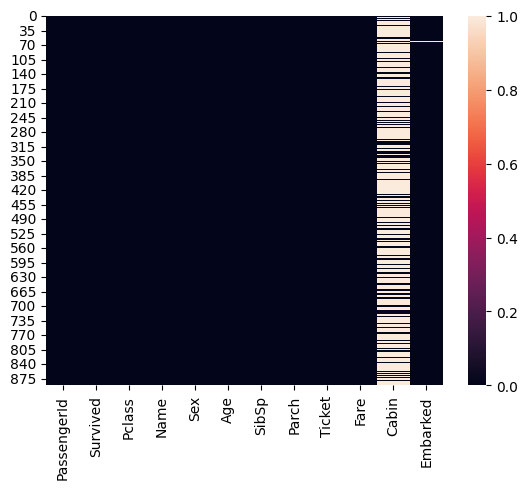

In [14]:
# Checking NA values using Heatmap
sns.heatmap(train.isnull())

In [15]:
# Droppng 'Cabin' Column as there are lots of missing Values
train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [16]:
train.dropna(inplace=True)

In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# Dropping 'PassengerId', 'Name' and 'Ticket' as these are unnecessary for prediction
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
# One hot Encoding of 'Sex' Column
sex=pd.get_dummies(train['Sex'],drop_first=True)
test_sex=pd.get_dummies(test['Sex'],drop_first=True)

In [21]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [22]:
# One hot Encoding of 'Embarked' Column
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
test_embarked=pd.get_dummies(test['Embarked'],drop_first=True)

In [23]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [24]:
# Dropping 'Sex' and 'Embarked' column as we one hot encoded it and will merge later
train=train.drop(['Sex','Embarked'],axis=1)
test=test.drop(['Sex','Embarked'],axis=1)

In [25]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [26]:
#Merging one hot encoded 'Sex' and 'Embarked' column to dataset
train=pd.concat([train,sex,embarked],axis=1)
test=pd.concat([test,test_sex,test_embarked],axis=1)

In [27]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [28]:
test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,0,0,7.2500,1,1,0
1,3,38.0,1,0,71.2833,0,0,1
2,2,26.0,0,0,7.9250,1,1,0
3,3,35.0,0,0,53.1000,1,0,1
4,3,35.0,1,1,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,0.0000,1,0,1
414,1,44.0,0,0,7.9250,0,0,0
415,3,25.0,0,0,8.0500,1,0,1
416,3,34.0,0,0,32.5000,1,0,1


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
x=train.drop('Survived',axis=1)
y=train['Survived']
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# 1. SVC Model

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [31]:
X_train

array([[1.        , 0.24604172, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.00414677, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.54762503, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.5       , 0.30887158, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.37170143, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.62302086, 0.25      , ..., 1.        , 0.        ,
        1.        ]])

In [32]:
from sklearn.svm import SVC

svm =SVC()
svm.fit(X_train, y_train)

prediction=svm.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       100
           1       0.98      0.58      0.73        78

    accuracy                           0.81       178
   macro avg       0.86      0.78      0.79       178
weighted avg       0.85      0.81      0.80       178

[[99  1]
 [33 45]]


# 2. GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.5,1,10,50,100,1000],'gamma':[1,0.1,0.001,0.0001,0.00001,0.000001]}
grid=GridSearchCV(SVC(),param_grid, refit=True,verbose=2)

grid.fit(X_train,y_train)
grid_predictions=grid.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.5, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.5

[CV] END ..................................C=50, gamma=1e-05; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-06; total time=   0.0s
[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................

In [35]:
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       100
           1       0.96      0.62      0.75        78

    accuracy                           0.82       178
   macro avg       0.86      0.80      0.80       178
weighted avg       0.85      0.82      0.81       178

[[98  2]
 [30 48]]


# 3. Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_predictions=lr.predict(X_test)
print(classification_report(y_test,lr_predictions))
print(confusion_matrix(y_test,lr_predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       100
           1       0.88      0.72      0.79        78

    accuracy                           0.83       178
   macro avg       0.84      0.82      0.82       178
weighted avg       0.84      0.83      0.83       178

[[92  8]
 [22 56]]


# 4. K Neighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
error_list=[]
for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_predictions=knn.predict(X_test)
    error_list.append(np.mean(knn_predictions !=y_test))
    
# print(classification_report(y_test,knn_predictions))
# print(confusion_matrix(y_test,knn_predictions))

2

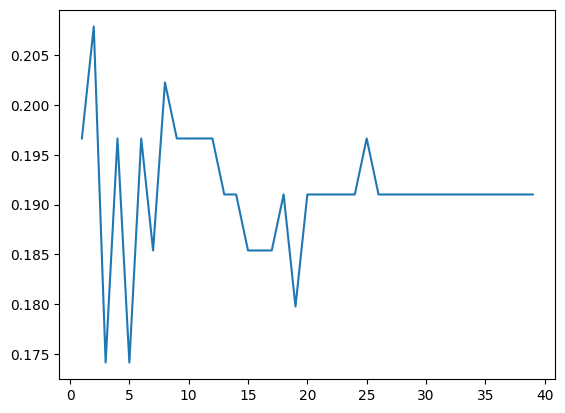

In [38]:
plt.plot(range(1,40),error_list)
np.argmin(error_list)

In [39]:
error_list[3]

0.19662921348314608

In [40]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn_predictions=knn.predict(X_test)
error_list.append(np.mean(knn_predictions !=y_test))

In [41]:
print(classification_report(y_test,knn_predictions))
print(confusion_matrix(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       100
           1       0.98      0.56      0.72        78

    accuracy                           0.80       178
   macro avg       0.86      0.78      0.78       178
weighted avg       0.85      0.80      0.79       178

[[99  1]
 [34 44]]


# 5. Decision Tree Classifier & 
# 6. Random Forest Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=200)

dt.fit(X_train,y_train)
rfc.fit(X_train,y_train)

dt_predictions=dt.predict(X_test)
rfc_predictions=rfc.predict(X_test)

In [43]:
print(classification_report(y_test,dt_predictions))
print(confusion_matrix(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.80      0.67      0.73        78

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

[[87 13]
 [26 52]]


In [44]:
print(classification_report(y_test,rfc_predictions))
print(confusion_matrix(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       100
           1       0.86      0.73      0.79        78

    accuracy                           0.83       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.83      0.83      0.83       178

[[91  9]
 [21 57]]


In [70]:
# Prediction percentage is higher in Logistic Regression (83%) so using it as final prediction
submission_pred=lr.predict(test)

C:\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [71]:
# Converting required Columns in a DataFrame
df=pd.DataFrame({"PassengerId":id.values,
                 "Survived":submission_pred,
                })

In [72]:
# test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [73]:
# test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [74]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [76]:
# Converting into CSV
df.to_csv('submission.csv',index=False)